In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
import yfinance as yf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
path = "./data/QQQ.csv"
df = pd.read_csv(path)
df2 = yf.download('QQQ')
to_row = int(len(df)*0.9)
train = list(df[0:to_row]['High'])
test = list(df[to_row:]['High'])

[*********************100%***********************]  1 of 1 completed


In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-10,51.125000,51.156250,50.281250,51.062500,44.229832,5232000
1,1999-03-11,51.437500,51.734375,50.312500,51.312500,44.446384,9688600
2,1999-03-12,51.125000,51.156250,49.656250,50.062500,43.363644,8743600
3,1999-03-15,50.437500,51.562500,49.906250,51.500000,44.608791,6369000
4,1999-03-16,51.718750,52.156250,51.156250,51.937500,44.987747,4905800
...,...,...,...,...,...,...,...
5779,2022-02-24,318.839996,341.040009,318.260010,340.489990,340.489990,130614100
5780,2022-02-25,341.309998,345.980011,337.390015,345.769989,345.769989,78842100
5781,2022-02-28,342.510010,348.540009,341.320007,346.799988,346.799988,77226200
5782,2022-03-01,345.750000,348.079987,338.899994,341.489990,341.489990,67407000


In [63]:
model_predictions= []
n_test_obser = len(test)

In [64]:
for i in range(n_test_obser):
    model = sm.tsa.arima.ARIMA(train, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test[i]
    train.append(actual_test_value)
    print("Epoch: ",i)
    print(len(model_predictions))

Epoch:  0
1
Epoch:  1
2
Epoch:  2
3
Epoch:  3
4
Epoch:  4
5
Epoch:  5
6
Epoch:  6
7
Epoch:  7
8
Epoch:  8
9
Epoch:  9
10
Epoch:  10
11
Epoch:  11
12
Epoch:  12
13
Epoch:  13
14
Epoch:  14
15
Epoch:  15
16
Epoch:  16
17
Epoch:  17
18
Epoch:  18
19
Epoch:  19
20
Epoch:  20
21
Epoch:  21
22
Epoch:  22
23
Epoch:  23
24
Epoch:  24
25
Epoch:  25
26
Epoch:  26
27
Epoch:  27
28
Epoch:  28
29
Epoch:  29
30
Epoch:  30
31
Epoch:  31
32
Epoch:  32
33
Epoch:  33
34
Epoch:  34
35
Epoch:  35
36
Epoch:  36
37
Epoch:  37
38
Epoch:  38
39
Epoch:  39
40
Epoch:  40
41
Epoch:  41
42
Epoch:  42
43
Epoch:  43
44
Epoch:  44
45
Epoch:  45
46
Epoch:  46
47
Epoch:  47
48
Epoch:  48
49
Epoch:  49
50
Epoch:  50
51
Epoch:  51
52
Epoch:  52
53
Epoch:  53
54
Epoch:  54
55
Epoch:  55
56
Epoch:  56
57
Epoch:  57
58
Epoch:  58
59
Epoch:  59
60
Epoch:  60
61
Epoch:  61
62
Epoch:  62
63
Epoch:  63
64
Epoch:  64
65
Epoch:  65
66
Epoch:  66
67
Epoch:  67
68
Epoch:  68
69
Epoch:  69
70
Epoch:  70
71
Epoch:  71
72
Epoch:  72


Epoch:  526
527
Epoch:  527
528
Epoch:  528
529
Epoch:  529
530
Epoch:  530
531
Epoch:  531
532
Epoch:  532
533
Epoch:  533
534
Epoch:  534
535
Epoch:  535
536
Epoch:  536
537
Epoch:  537
538
Epoch:  538
539
Epoch:  539
540
Epoch:  540
541
Epoch:  541
542
Epoch:  542
543
Epoch:  543
544
Epoch:  544
545
Epoch:  545
546
Epoch:  546
547
Epoch:  547
548
Epoch:  548
549
Epoch:  549
550
Epoch:  550
551
Epoch:  551
552
Epoch:  552
553
Epoch:  553
554
Epoch:  554
555
Epoch:  555
556
Epoch:  556
557
Epoch:  557
558
Epoch:  558
559
Epoch:  559
560
Epoch:  560
561
Epoch:  561
562
Epoch:  562
563
Epoch:  563
564
Epoch:  564
565
Epoch:  565
566
Epoch:  566
567
Epoch:  567
568
Epoch:  568
569
Epoch:  569
570
Epoch:  570
571
Epoch:  571
572
Epoch:  572
573
Epoch:  573
574
Epoch:  574
575
Epoch:  575
576
Epoch:  576
577
Epoch:  577
578
Epoch:  578
579


In [65]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5783
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -10247.189
Date:                Sun, 13 Mar 2022   AIC                          20504.377
Time:                        19:21:42   BIC                          20537.690
Sample:                             0   HQIC                         20515.967
                               - 5783                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1078      0.006     19.567      0.000       0.097       0.119
ar.L2         -0.0229      0.006     -3.676      0.000      -0.035      -0.011
ar.L3         -0.0444      0.005     -8.458      0.0

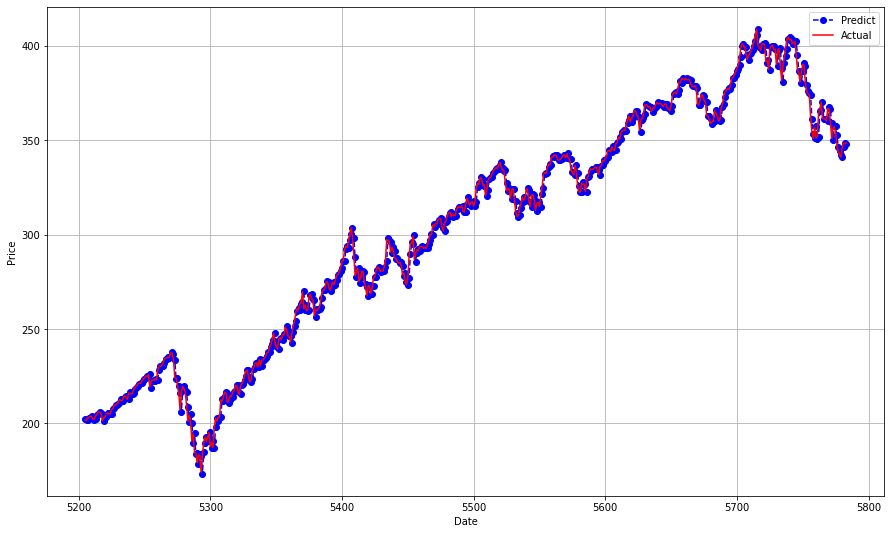

In [67]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='Predict')
plt.plot(date_range, test, color='red',label='Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
len(test)

579

In [71]:
mape=np.mean(np.abs(np.array(model_predictions)-np.array(test))/np.abs(test))
1-mape

0.9913625490177436

In [79]:
start_index = '2022-03-02'
end_index = '2022-03-02'
forecast = model_fit.predict()
forecast

array([  0.        ,  51.15626103,  51.79499513, ..., 340.89897679,
       346.54462236, 348.70223621])